# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Fadhilah Nurrahmayanti
- Email: a117xbm150@devacademy.id
- Id Dicoding: dilaafn

## Persiapan

### Menyiapkan library yang dibutuhkan

Pada langkah ini, dilakukan proses mengimpor semua pustaka yang diperlukan untuk manipulasi data, visualisasi, ekspor data, pemodelan machine learning, evaluasi, dan pembuatan prototipe menggunakan Streamlit.

In [1]:
!pip install catboost
!pip install optuna
!pip install lime
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=d34f5c5d7079a509ff1f435f424b068491df3f889e080c905528beaa94ff9390
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder, RobustScaler, OrdinalEncoder, TargetEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, StratifiedGroupKFold, cross_val_score, KFold
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer, KNNImputer

import lightgbm
import optuna
import lime
import shap
import lime.lime_tabular
import joblib

from lime.lime_tabular import LimeTabularExplainer

import warnings
warnings.filterwarnings('ignore')

sns.set(style='whitegrid')

Insight:

* Library yang digunakan telah mencakup seluruh siklus kerja machine learning dari preprocessing, pemodelan, evaluasi, hingga interpretasi model
* pandas dan numpy digunakan untuk manipulasi data tabular dan operasi numerik
* matplotlib dan seaborn digunakan untuk visualisasi data eksploratif dan statistik
* sklearn.preprocessing seperti LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder, dan RobustScaler digunakan untuk encoding dan normalisasi fitur
* train\_test\_split dan cross-validation seperti StratifiedKFold dan KFold digunakan untuk pembagian data dan validasi model
* Model gradient boosting seperti XGBoost, LightGBM, dan CatBoost digunakan sebagai algoritma utama untuk klasifikasi
* SMOTE digunakan untuk menangani ketidakseimbangan kelas pada data
* Pipeline dan ColumnTransformer digunakan untuk merapikan alur preprocessing dan pemodelan
* SimpleImputer dan KNNImputer digunakan untuk menangani nilai yang hilang (missing values)
* optuna digunakan untuk tuning hyperparameter model secara otomatis dan efisien
* shap dan lime digunakan untuk interpretasi model dengan pendekatan explainable AI
* classification\_report, confusion\_matrix, f1\_score, recall\_score, precision\_score, dan roc\_auc\_score digunakan sebagai metrik evaluasi model
* joblib digunakan untuk menyimpan dan memuat model yang telah dilatih
* Struktur import yang rapi mencerminkan pendekatan machine learning modern yang memperhatikan reproducibility, interpretability, dan efisiensi proses

### Menyiapkan data yang akan digunakan

In [3]:
url = "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/students_performance/data.csv"

df = pd.read_csv(url, sep=';')
df

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,5,4,122.2,0,0,0,1,1,0,19,0,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,9,9,119.0,1,0,1,0,0,0,18,1,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,9,9,149.5,1,0,0,1,0,1,30,0,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,7,4,153.8,1,0,0,1,0,1,20,0,0,5,5,5,13.800000,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


Insight:

* Dataset diunduh langsung dari sumber online berbentuk CSV dengan delimiter titik koma
* Data terdiri dari 4424 baris dan 37 kolom yang merepresentasikan informasi terkait performa mahasiswa
* Fitur dalam data mencakup aspek akademik (seperti nilai, jumlah mata kuliah, dan status studi) serta demografis (seperti status pernikahan dan kualifikasi orang tua)
* Kolom `Status` menunjukkan label target yang akan diprediksi, seperti Dropout dan Graduate
* Data memuat kombinasi fitur kategorikal dan numerik yang memerlukan proses preprocessing lanjutan sebelum modeling
* Nilai-nilai pada beberapa kolom seperti `Previous_qualification_grade` atau `GDP` menunjukkan kemungkinan variasi skala antar fitur
* Jumlah fitur yang relatif banyak membuka peluang untuk eksplorasi data, pemilihan fitur, dan engineering fitur sebelum pemodelan


## Data Understanding

Melakukan eksplorasi data awal untuk memahami struktur dan isi dataset. Hal ini mencakup pengecekan bentuk (shape), tipe data, nilai yang hilang, dan distribusi variabel target.

In [4]:
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

df.info()

missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("\nMissing values found:")
print(missing_values if not missing_values.empty else "No missing values found.")

df.describe()

Dataset contains 4424 rows and 37 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualificatio

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


Insight:

* Dataset terdiri dari 4424 baris dan 37 kolom, seluruh kolom terisi lengkap tanpa nilai kosong
* Semua fitur bertipe numerik (integer atau float) kecuali kolom `Status` yang merupakan tipe objek dan berfungsi sebagai label target
* Data memiliki banyak fitur kategorikal yang direpresentasikan dalam bentuk angka, yang nantinya memerlukan encoding atau pemetaan untuk interpretasi
* Statistik deskriptif menunjukkan rentang nilai yang cukup luas pada beberapa kolom seperti `GDP`, `Unemployment_rate`, dan `Previous_qualification`, mengindikasikan potensi outlier atau skala yang berbeda antar fitur
* Kolom seperti `Curricular_units_1st_sem_grade` dan `Curricular_units_2nd_sem_grade` memiliki mean dan standar deviasi yang signifikan, menggambarkan distribusi performa akademik mahasiswa yang bervariasi
* Tidak terdapat nilai nol atau negatif yang mencurigakan pada kolom bertipe persentase atau grade, namun tetap diperlukan eksplorasi lanjutan untuk validasi logika nilai-nilainya

### Exploratory Data Analysis (EDA)

#### Univariate Analysis

Berfokus pada variabel target Status, yang merepresentasikan hasil akhir mahasiswa: Graduate (Lulus), Dropout (Mengundurkan Diri), atau Enrolled (Masih Terdaftar). Analisis ini akan membantu kita memahami distribusi dari kategori-kategori tersebut.

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

Percentage Distribution:
Status
Graduate    49.93
Dropout     32.12
Enrolled    17.95
Name: count, dtype: float64


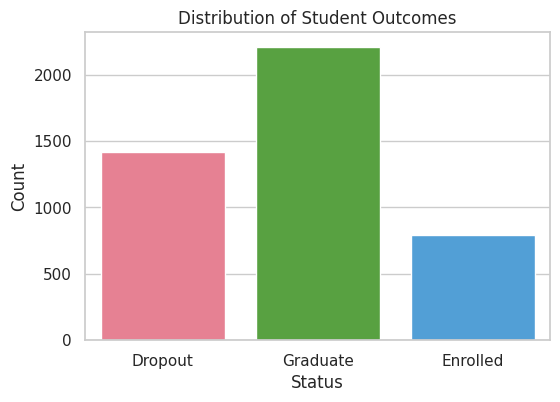

In [5]:
status_counts = df['Status'].value_counts()

print(status_counts)
print("\nPercentage Distribution:")
print((status_counts / len(df) * 100).round(2))

plt.figure(figsize=(6, 4))

sns.countplot(data=df, x='Status', palette='husl')

plt.title('Distribution of Student Outcomes')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

Insight:

* Sebagian besar mahasiswa dalam dataset berstatus graduate sebesar 49.93%
* Mahasiswa dropout berjumlah 32.12% dari total populasi, menunjukkan angka putus studi yang cukup tinggi
* Hanya 17.95% mahasiswa yang masih aktif terdaftar atau enrolled
* Visualisasi bar chart menunjukkan distribusi yang tidak seimbang dengan dominasi lulusan. Tingkat kelulusan dini (dropout) juga cukup signifikan, yaitu lebih dari 30% dari keseluruhan data. Ketidakseimbangan seperti ini sebaiknya ditangani saat pengembangan model untuk menghindari prediksi yang bias.

In [6]:
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

In [7]:
for col in categorical_features:
    print(f'{col} : {df[col].nunique()}')

Status : 3


In [8]:
for col in numeric_features:
    print(f'{col} : {df[col].nunique()}')

Marital_status : 6
Application_mode : 18
Application_order : 8
Course : 17
Daytime_evening_attendance : 2
Previous_qualification : 17
Previous_qualification_grade : 101
Nacionality : 21
Mothers_qualification : 29
Fathers_qualification : 34
Mothers_occupation : 32
Fathers_occupation : 46
Admission_grade : 620
Displaced : 2
Educational_special_needs : 2
Debtor : 2
Tuition_fees_up_to_date : 2
Gender : 2
Scholarship_holder : 2
Age_at_enrollment : 46
International : 2
Curricular_units_1st_sem_credited : 21
Curricular_units_1st_sem_enrolled : 23
Curricular_units_1st_sem_evaluations : 35
Curricular_units_1st_sem_approved : 23
Curricular_units_1st_sem_grade : 805
Curricular_units_1st_sem_without_evaluations : 11
Curricular_units_2nd_sem_credited : 19
Curricular_units_2nd_sem_enrolled : 22
Curricular_units_2nd_sem_evaluations : 30
Curricular_units_2nd_sem_approved : 20
Curricular_units_2nd_sem_grade : 786
Curricular_units_2nd_sem_without_evaluations : 10
Unemployment_rate : 10
Inflation_rate : 

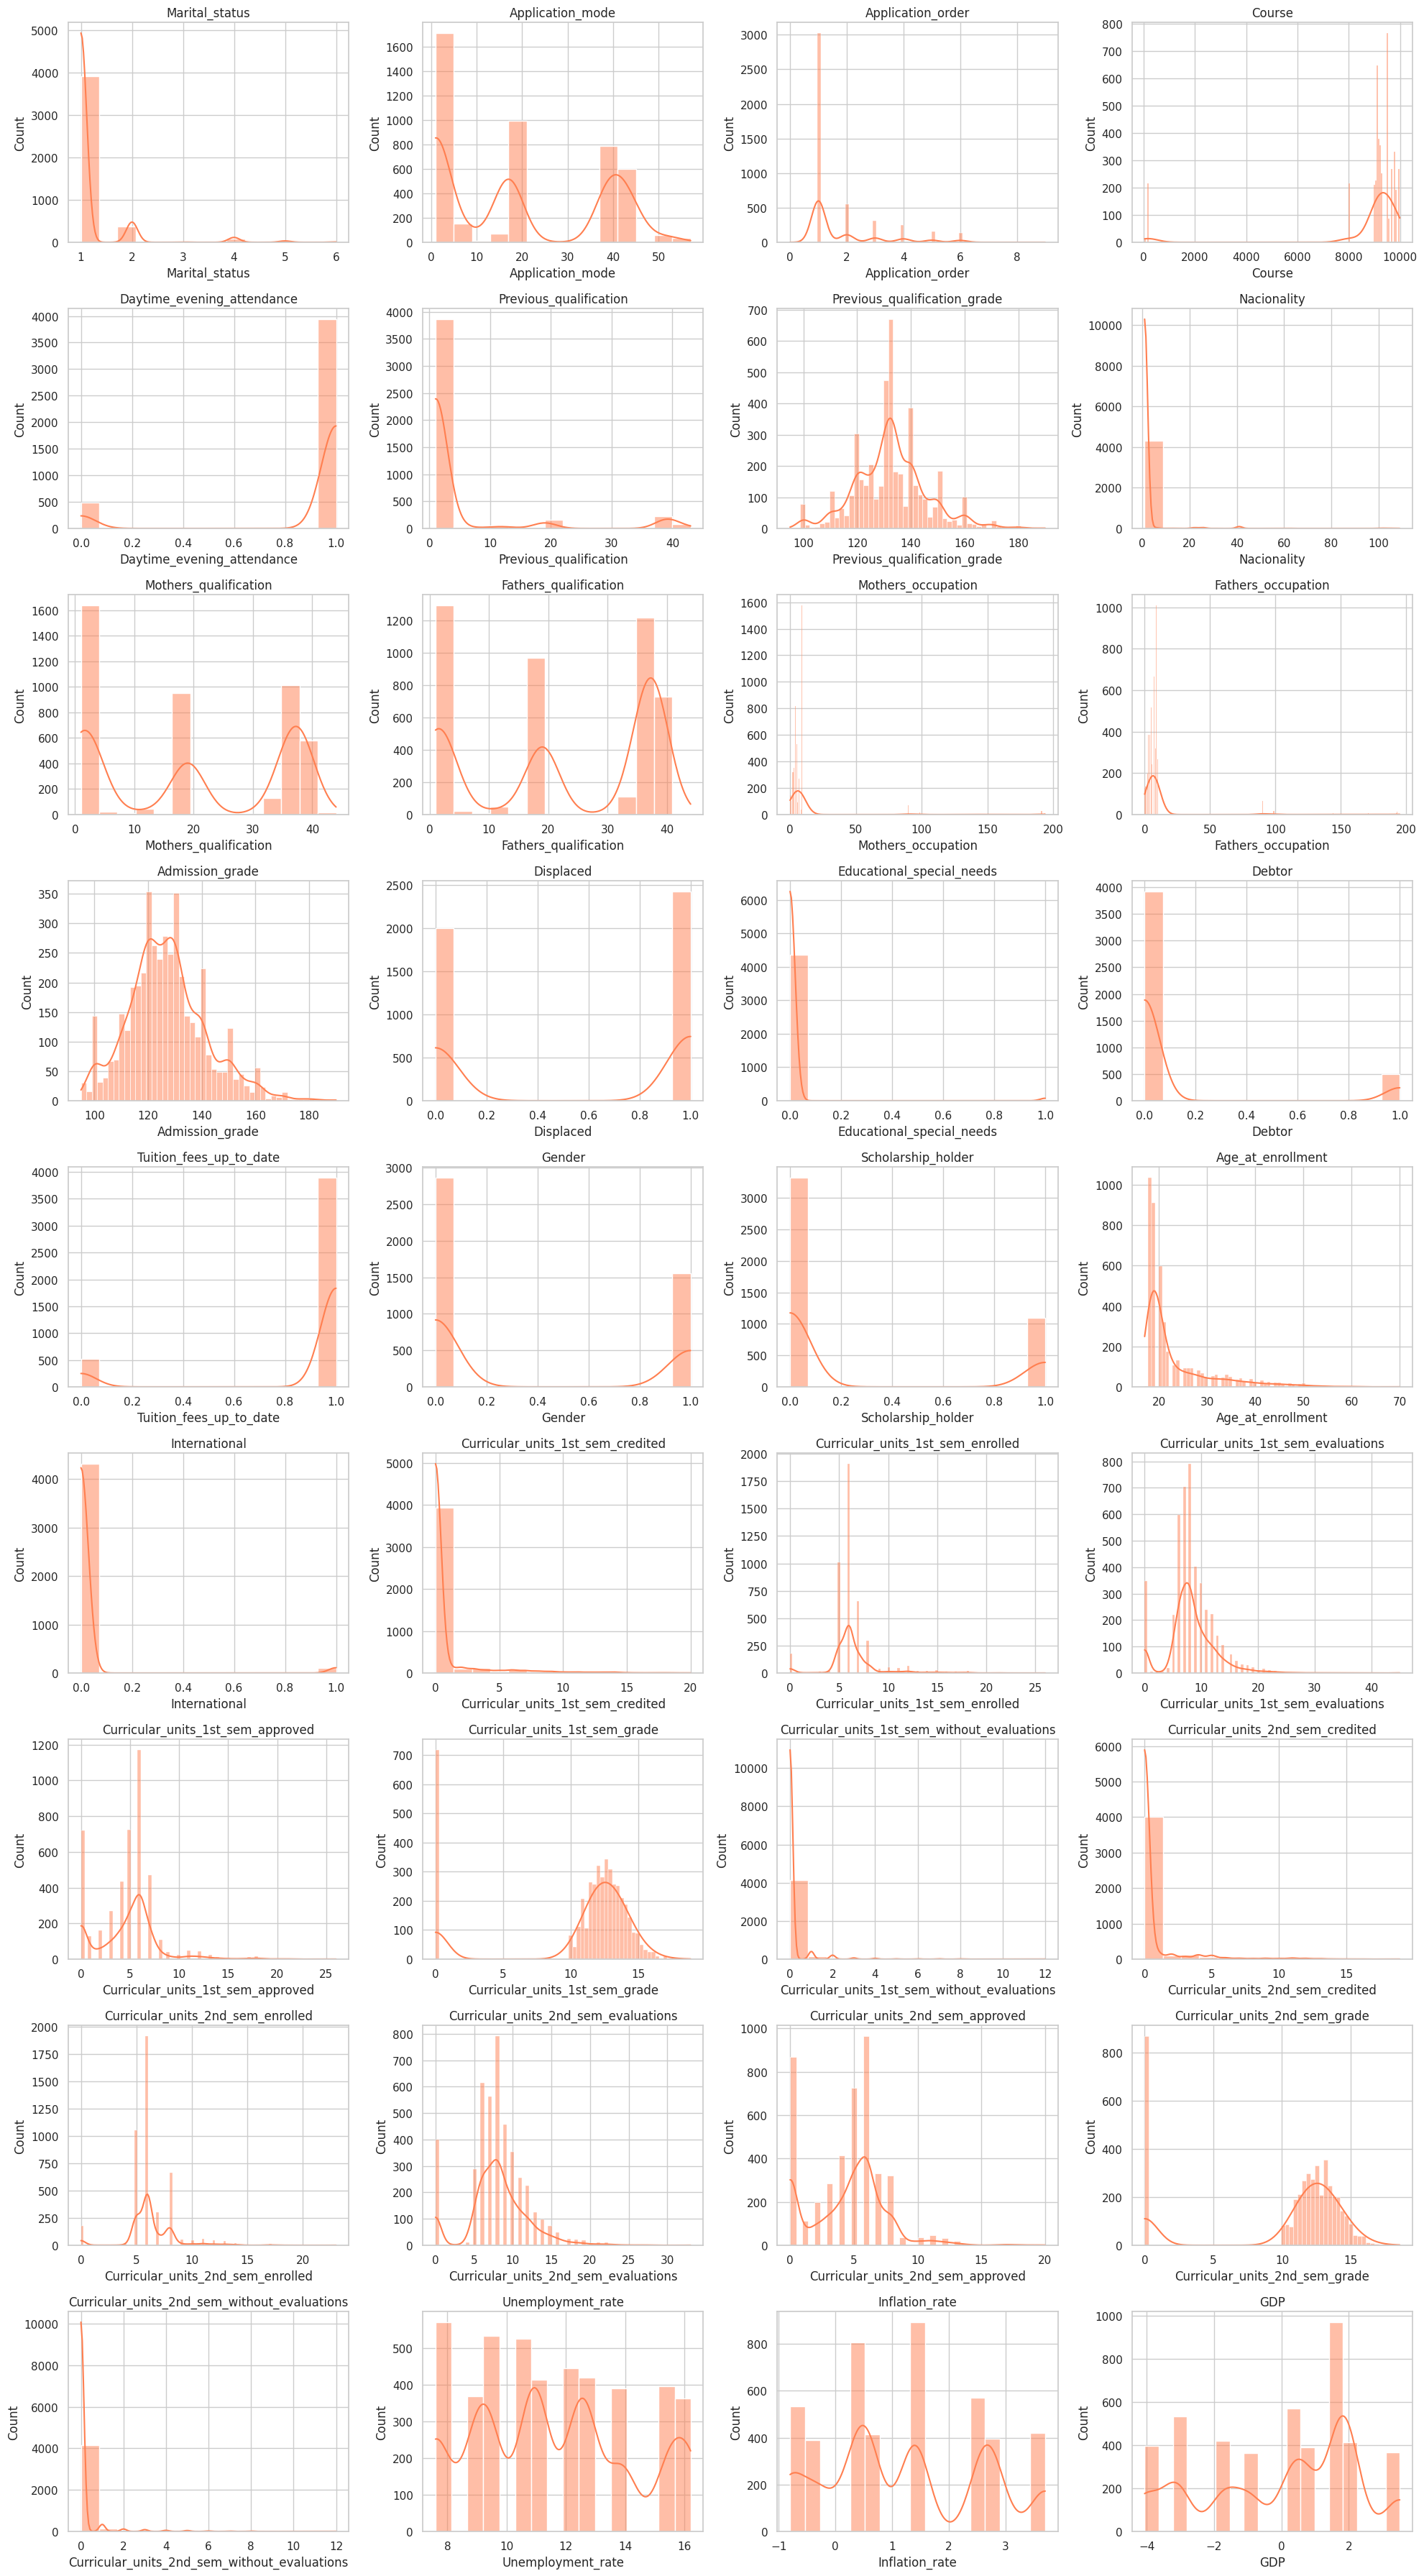

In [9]:
n = len(numeric_features)
width = 4
height = int(np.ceil(n / width))

fig, axes = plt.subplots(height, width, figsize=(5 * width, 4 * height))
axes = axes.flatten()

for i, col in enumerate(numeric_features):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i], color="coral")
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

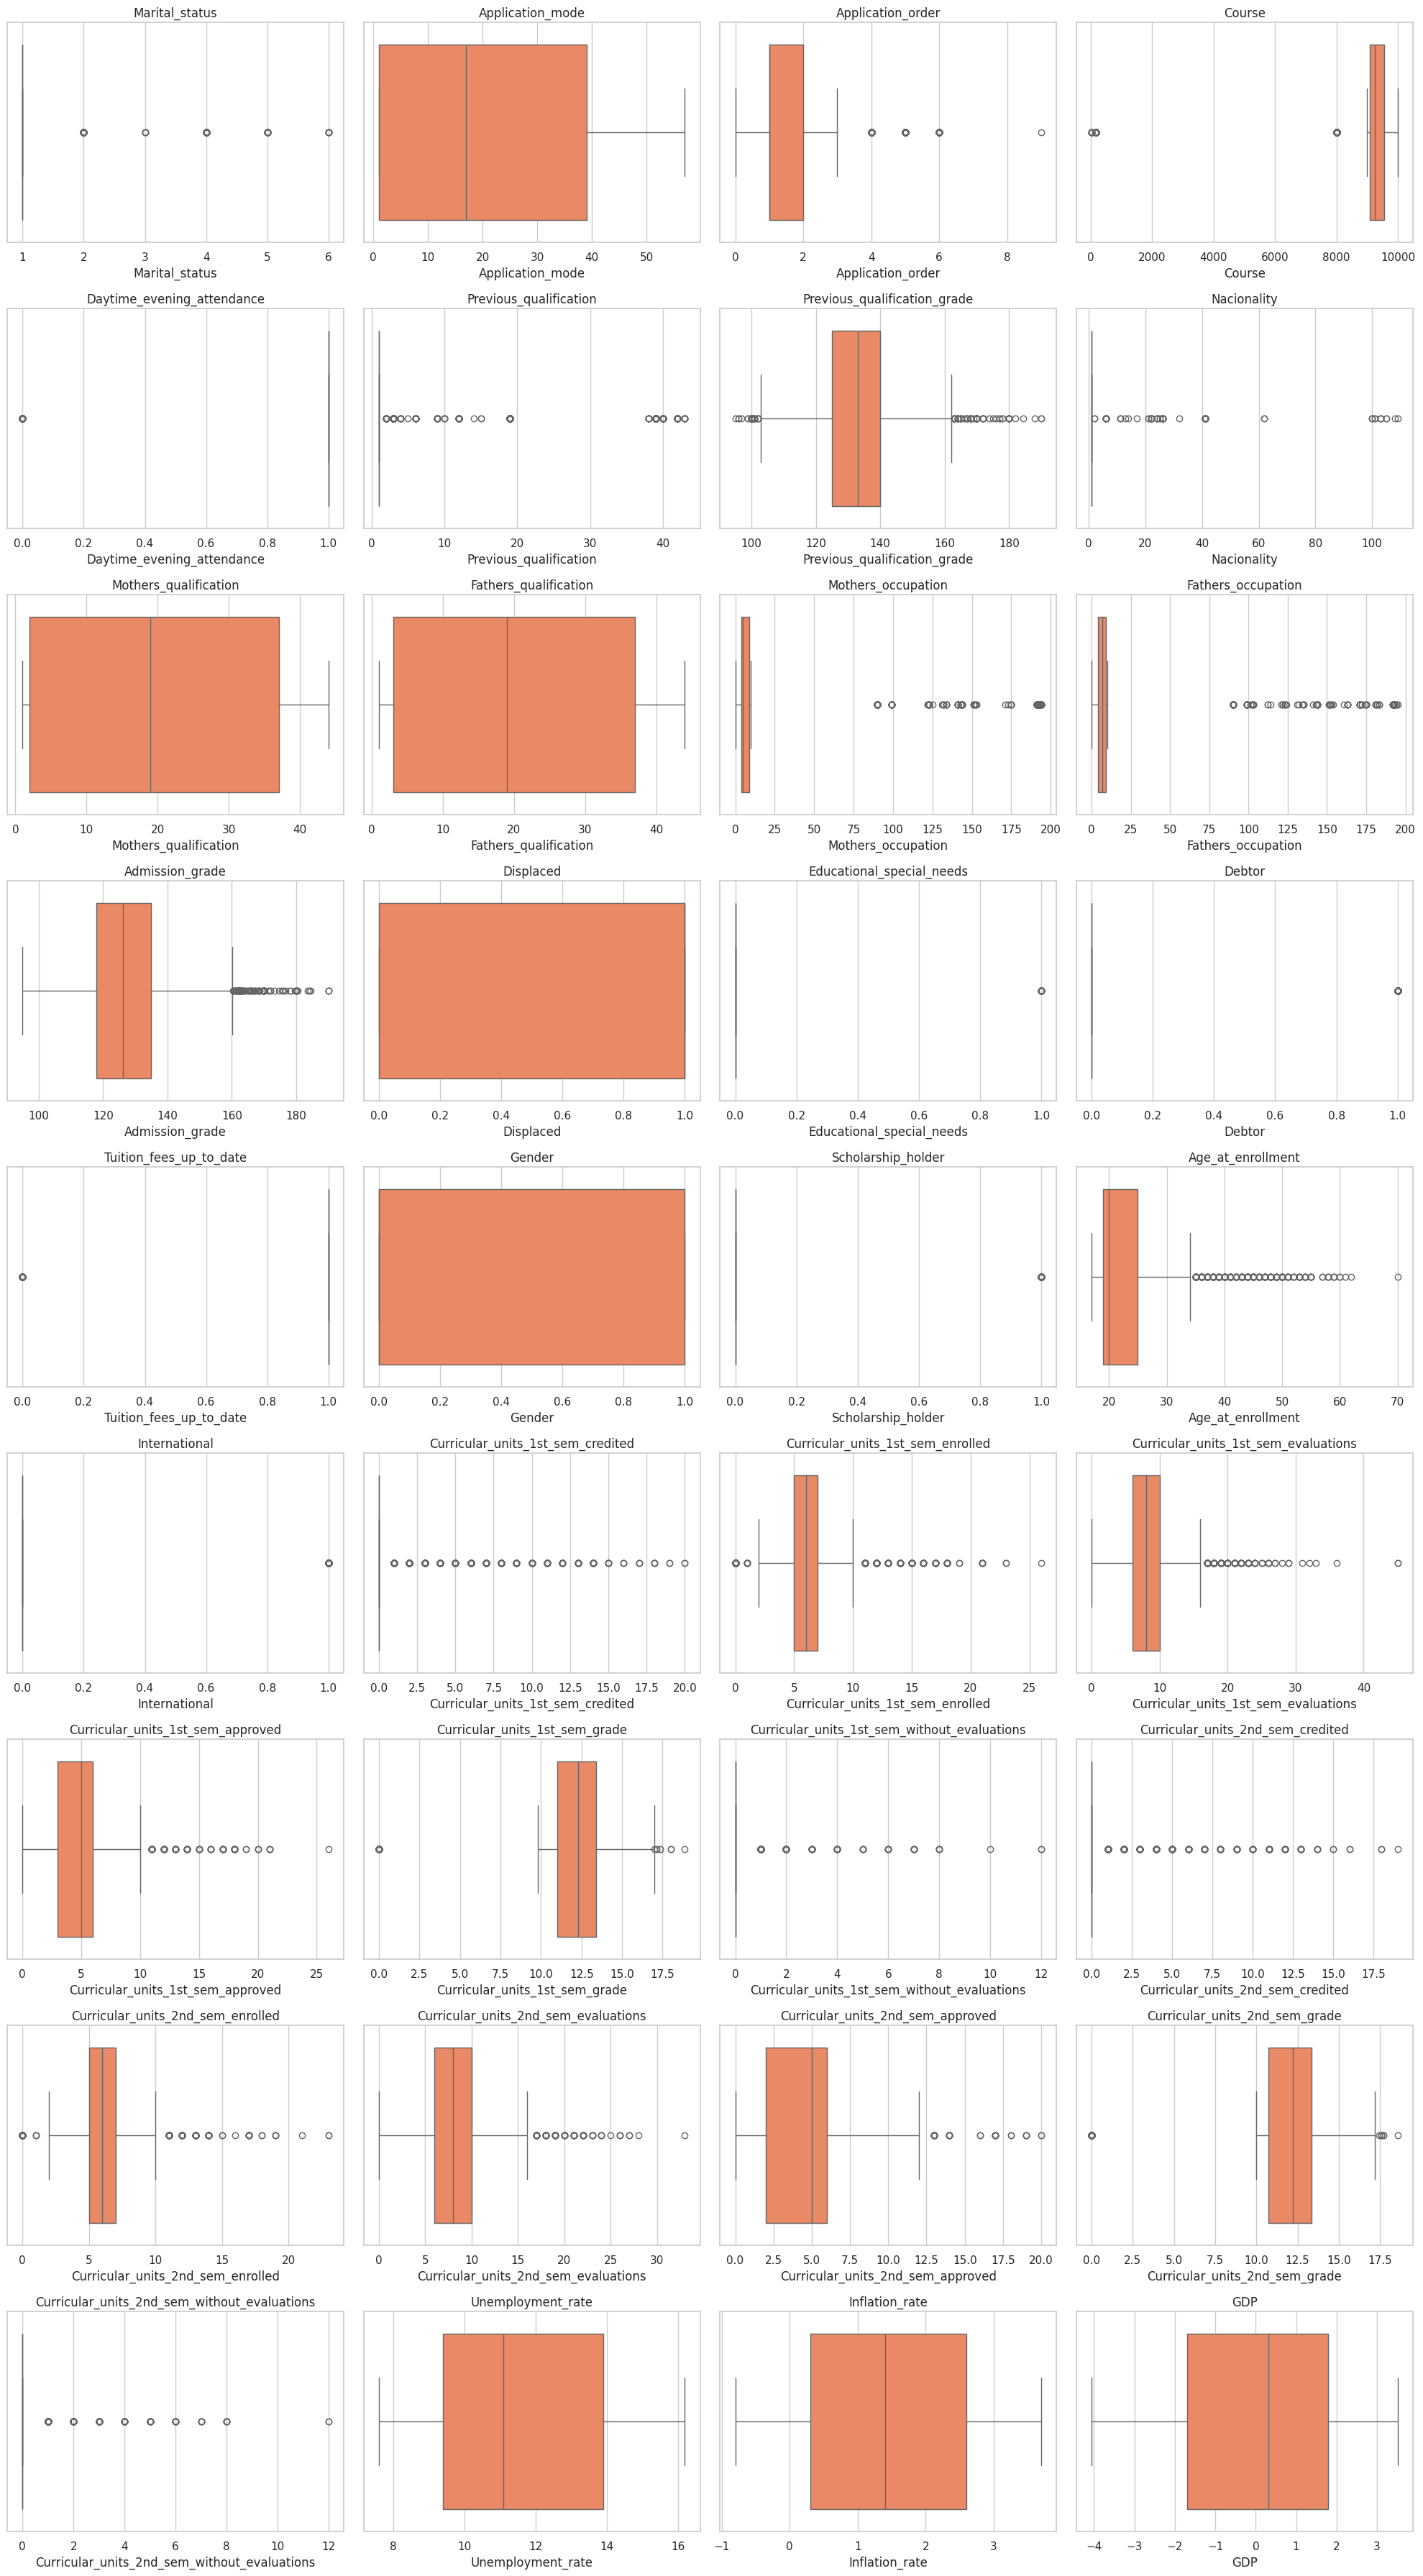

In [10]:
n = len(numeric_features)
width = 4
height = int(np.ceil(n / width))

fig, axes = plt.subplots(height, width, figsize=(5 * width, 4 * height))
axes = axes.flatten()

for i, col in enumerate(numeric_features):
    sns.boxplot(data=df, x=col, ax=axes[i], color="coral")
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

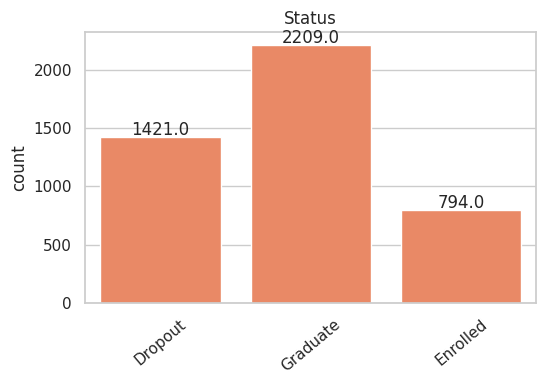

In [11]:
n = len(categorical_features)
width = 3
height = int(np.ceil(n / width))

fig, axes = plt.subplots(height, width, figsize=(5 * width, 4 * height))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    sns.countplot(data=df, x=col, ax=axes[i], color="coral")
    axes[i].tick_params(axis='x', rotation=40)
    axes[i].set_xlabel('')
    axes[i].set_title(col)
    for p in axes[i].patches:
        height = p.get_height()
        axes[i].annotate(f'{height}',
                         (p.get_x() + p.get_width() / 2., height),
                         ha='center', va='center',
                         xytext=(0, 5),
                         textcoords='offset points')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Bivariate Analysis

Bagian ini mengeksplorasi hubungan antar fitur numerik dalam dataset untuk memahami sejauh mana satu fitur berkaitan dengan fitur lainnya, termasuk yang relevan terhadap prediksi `Status`. Analisis ini dilakukan dengan menghitung korelasi antar variabel numerik menggunakan matriks korelasi, kemudian divisualisasikan dalam bentuk heatmap.

Korelasi yang kuat (positif atau negatif) dapat menunjukkan:

* adanya potensi hubungan linier antara dua variabel,
* indikasi multikolinearitas yang bisa mengganggu model prediktif,
* atau informasi penting untuk feature selection.

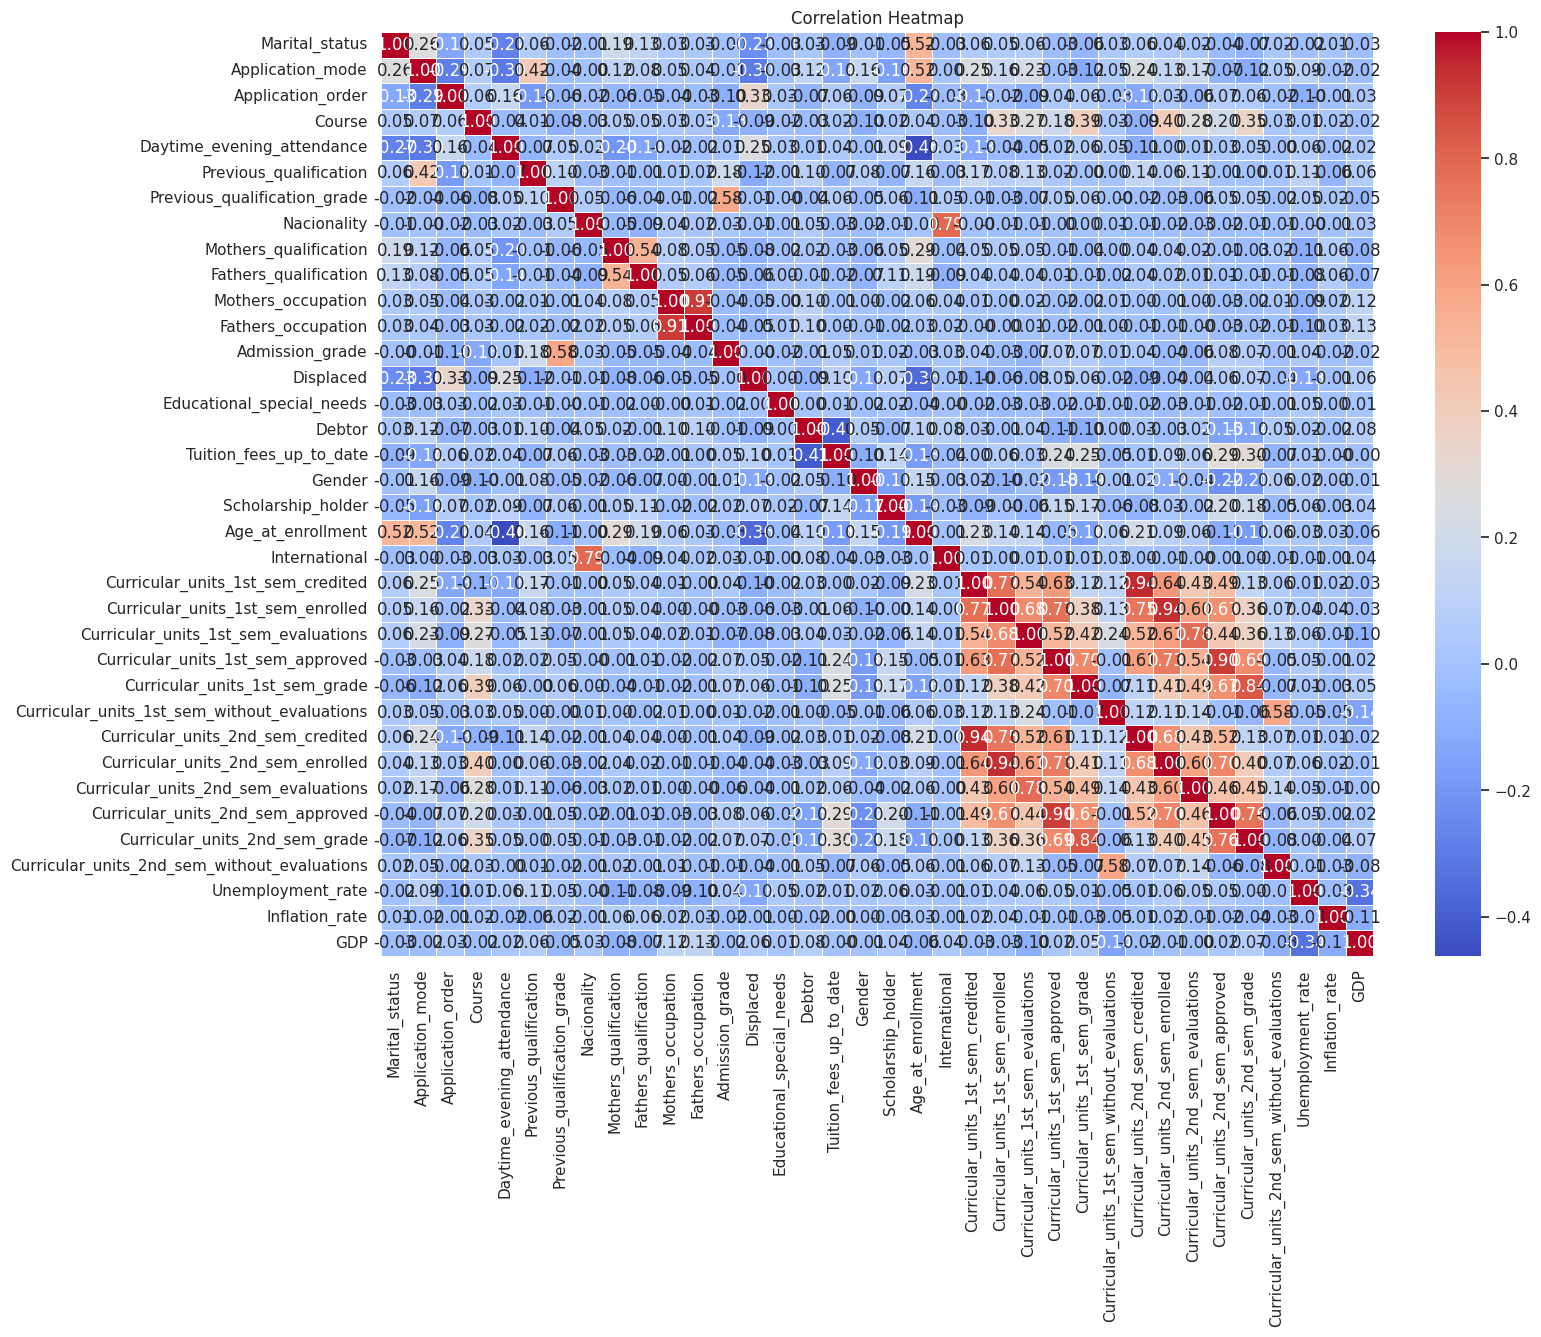

In [12]:
corr_matrix = df.drop(columns=['Status']).corr()

plt.figure(figsize=(16, 12))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()

Insight:

* Korelasi tertinggi secara positif ditemukan antar fitur akademik seperti:

  * curricular\_units\_1st\_sem\_approved dan curricular\_units\_1st\_sem\_grade (0.79)
  * curricular\_units\_2nd\_sem\_approved dan curricular\_units\_2nd\_sem\_grade (0.78)
  * curricular\_units\_1st\_sem\_approved dan curricular\_units\_2nd\_sem\_approved (0.76)
  * Hal ini menunjukkan konsistensi performa mahasiswa antar semester
* Tidak terdapat multikolinearitas ekstrem antar fitur non-akademik, karena korelasi antar variabel kategori sosial-ekonomi (seperti `Parents_occupation`, `Marital_status`, `Scholarship_holder`) berada di bawah 0.3
* Fitur `Age_at_enrollment` berkorelasi cukup tinggi dengan `Marital_status` (0.52), yang masuk akal secara logis
* Korelasi dengan variabel makro seperti `Inflation_rate`, `GDP`, dan `Unemployment_rate` sangat rendah terhadap fitur lainnya, menandakan pengaruhnya terhadap performa akademik tidak signifikan dalam dataset ini

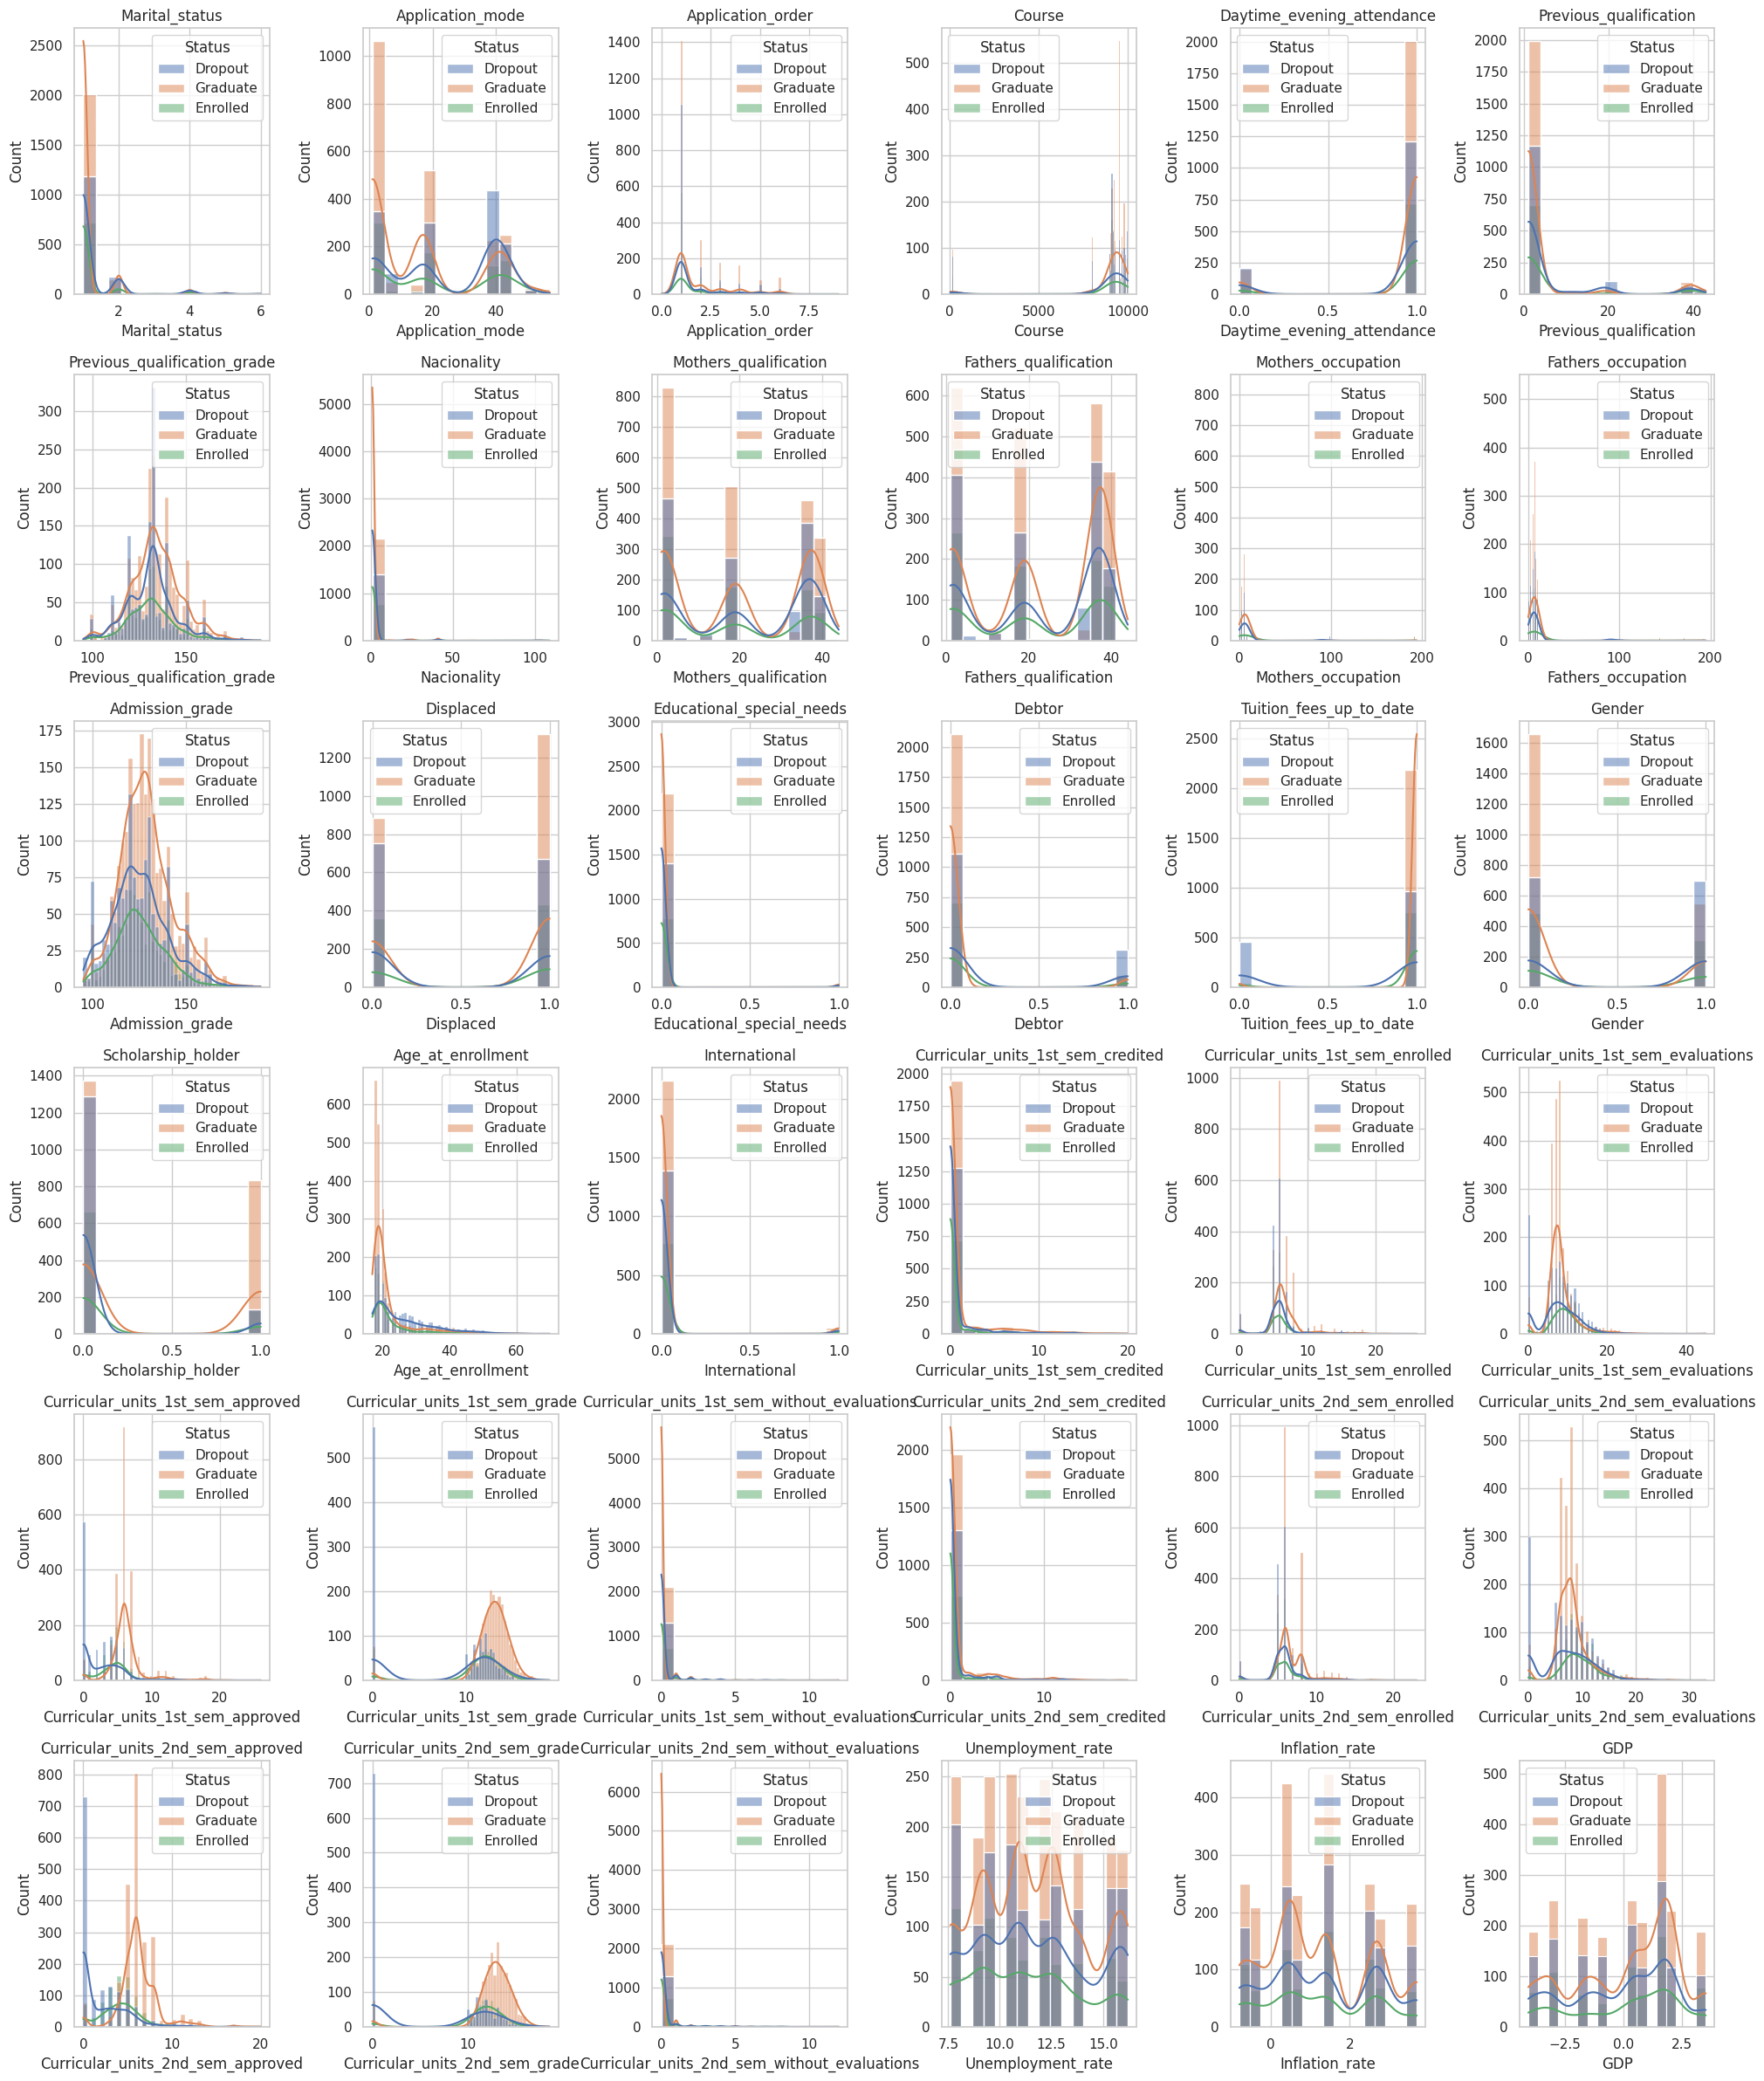

In [13]:
num_plots = len(numeric_features)
nrows, ncols = 6, 6

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 24))
axes = axes.flatten()

for i, col in enumerate(numeric_features):
    if i < len(axes):
        sns.histplot(data=df, x=col, ax=axes[i], hue='Status', kde=True)
        axes[i].set_title(col)
    else:
        print(f"Warning: Skipping feature {col}")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
n = len(numeric_features)
width = 4
height = int(np.ceil(n / width))

fig, axes = plt.subplots(height, width, figsize=(5 * width, 4 * height))
axes = axes.flatten()

for i, col in enumerate(numeric_features):
    sns.boxplot(data=df, x=col, hue='Status',ax=axes[i])
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
n = len(categorical_features)
width = 3
height = int(np.ceil(n / width))

fig, axes = plt.subplots(height, width, figsize=(5 * width, 4 * height))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    sns.countplot(data=df, x=col, ax=axes[i], hue='Status')
    axes[i].tick_params(axis='x', rotation=35)
    axes[i].set_xlabel('')
    axes[i].set_title(col)
    for p in axes[i].patches:
        height = p.get_height()
        axes[i].annotate(f'{height}',
                         (p.get_x() + p.get_width() / 2., height),
                         ha='center', va='center',
                         xytext=(0, 5),
                         textcoords='offset points')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Data Preparation / Preprocessing

Dataset disiapkan untuk pemodelan. Tahapan ini mencakup:

* Membersihkan Variabel Target: Menghapus entri yang tidak relevan dari variabel target Status.

* Menyandikan Variabel Kategorikal: Mengubah variabel kategorikal menjadi format numerik menggunakan LabelEncoder.

* Seleksi Fitur: Memilih fitur-fitur yang paling relevan untuk klasifikasi menggunakan SelectKBest dan pemilihan manual berdasarkan wawasan dari EDA (Exploratory Data Analysis).

* Standardisasi: Menstandarkan nilai fitur agar semua fitur memberikan kontribusi yang seimbang terhadap performa model.

* Menyeimbangkan Distribusi Kelas: Menangani ketidakseimbangan kelas menggunakan SMOTE (Synthetic Minority Over-sampling Technique).

* Membagi Data: Membagi dataset menjadi data pelatihan dan data pengujian dengan rasio 80:20.

### Label Encoding



In [ ]:
print(df['Status'].value_counts())
print(f'\nKolom Status sebelum encoding : {df["Status"].unique()}')

le = LabelEncoder()
df['Status'] = le.fit_transform(df['Status'])

print(f'Kolom Status setelah encoding : {df["Status"].unique()}')

### Feature Type Classification

Proses ini memisahkan fitur numerik dan kategorikal berdasarkan tipe data (`int`, `float`, `object`). Lalu mengecek fitur numerik dengan jumlah nilai unik kecil (≤ 3) dan memindahkannya ke fitur kategorikal, karena fitur seperti itu lebih tepat diperlakukan sebagai kategori.

In [ ]:
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

for col in numeric_features[:]:
    if df[col].nunique() <= 3:
        categorical_features.append(col)
        numeric_features.remove(col)

print('Fitur Kategorikal:')
for col in categorical_features:
    print(f'{col}: {df[col].nunique()}')

print('\nFitur Numerik:')
for col in numeric_features:
    print(f'{col}: {df[col].nunique()}')

## Modeling

RandomForestClassifier membuat kumpulan (ensemble) pohon keputusan untuk meningkatkan akurasi prediksi dan mengurangi overfitting, dengan `random_state=42` untuk memastikan hasil yang konsisten dan `class_weight='balanced'` untuk menangani ketidakseimbangan kelas. `RandomizedSearchCV` digunakan untuk secara efisien menemukan hyperparameter terbaik dengan cara mengambil sampel acak dari kombinasi parameter yang telah ditentukan. Model terbaik, yang dilatih dengan hyperparameter yang telah dioptimalkan, kemudian dievaluasi untuk mendapatkan performa yang lebih baik.

In [ ]:
X = df.drop(columns=['Status'])
y = df['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=y)

display(y_train.value_counts(normalize=True), y_test.value_counts(normalize=True))

### Train & Evaluate Models

#### LightGBM

In [ ]:
lgb = LGBMClassifier(n_estimators=10000,
                     n_jobs=-1,
                     random_state=42,
                     verbose=1)

lgb.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        callbacks=[
            lightgbm.early_stopping(stopping_rounds=500),
            lightgbm.log_evaluation(period=100)
        ])

#### XGBoost

In [ ]:
xgb = XGBClassifier(n_estimators=10000,
                    random_state=42,
                    n_jobs=-1,
                    eval_metric='auc',
                    objective='multi:softprob',
                    early_stopping_rounds=1000)

xgb.fit(X_train, y_train,
        verbose=100,
        eval_set=[(X_test, y_test)])

#### CatBoost

In [ ]:
cat = CatBoostClassifier(n_estimators=10000,
                         random_state=42,
                         verbose=100,
                         early_stopping_rounds=1000,
                         thread_count=-1)

cat.fit(X_train, y_train, eval_set=[(X_test, y_test)])

## Evaluation

`classification_report` adalah fungsi untuk mengevaluasi performa model klasifikasi dengan memberikan metrik rinci untuk setiap kelas:

* **Presisi (Precision):** Dari semua prediksi untuk suatu kelas tertentu, berapa banyak yang benar?
  → Presisi = TP / (TP + FP)
* **Recall (Sensitivitas):** Dari semua kasus sebenarnya pada suatu kelas, berapa banyak yang berhasil diidentifikasi dengan benar oleh model?
  → Recall = TP / (TP + FN)
* **F1-score:** Rata-rata harmonis antara presisi dan recall; menyeimbangkan kedua metrik tersebut.
  → F1 = 2 \* (Presisi \* Recall) / (Presisi + Recall)
* **Support:** Jumlah kasus aktual untuk setiap kelas dalam dataset.

In [ ]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f'accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'recall: {recall_score(y_test, y_pred, average="weighted")}')
    print(f'precision: {precision_score(y_test, y_pred, average="weighted")}')
    print(f'f1 score: {f1_score(y_test, y_pred, average="weighted")}')
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

In [ ]:
evaluate_model(lgb, X_test, y_test)

In [ ]:
evaluate_model(xgb, X_test, y_test)

In [ ]:
evaluate_model(cat, X_test, y_test)

Insight:

* Model menunjukkan performa yang seimbang di kedua kelas. Presisi, recall, dan F1-score untuk kelas 0 dan 1 semuanya sebesar 0,87, yang menunjukkan bahwa model sama efektifnya dalam meminimalkan false positive maupun false negative pada kedua kelas tersebut.
* Akurasi sebesar 0,87 mengonfirmasi bahwa model berhasil memprediksi dengan benar 87% dari seluruh sampel uji. Dengan rata-rata makro dan rata-rata tertimbang juga sebesar 0,87, hal ini menunjukkan bahwa performa model konsisten tanpa dipengaruhi distribusi kelas.
* Secara keseluruhan, model ini memiliki performa yang baik dan dapat diandalkan untuk memprediksi kedua kelas.

### Feature Importance

In [ ]:
print("Feature Importance:")
feature_importance = lgb.feature_importances_
feature_names = X_train.columns

sorted_idx = np.argsort(feature_importance)[::-1]
sorted_feature_importance = feature_importance[sorted_idx]
sorted_feature_names = [feature_names[i] for i in sorted_idx]

for name, imp in zip(sorted_feature_names, sorted_feature_importance):
    print(f"{name}: {imp:.4f}")

plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_feature_importance, color='coral')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from LightGBM Model (Sorted)')
plt.tight_layout()
plt.show()

### SHAP Interpretability

In [ ]:
explainer = shap.Explainer(lgb)
shap_values = explainer(X_test)

# Kelas 0
shap.summary_plot(shap_values[:, :, 0], X_test, feature_names=X_test.columns)

# Kelas 1
shap.summary_plot(shap_values[:, :, 1], X_test, feature_names=X_test.columns)

# Kelas 2
shap.summary_plot(shap_values[:, :, 2], X_test, feature_names=X_test.columns)

### LIME Interpretability

In [ ]:
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    X_train.values,
    mode='classification',
    feature_names=X_train.columns.tolist(),
    class_names=['Dropout', 'Enrolled', 'Graduate'],
    discretize_continuous=True)

for i in range(10):
    exp = explainer_lime.explain_instance(X_test.values[i],
                                          lgb.predict_proba,
                                          num_features=15)
    exp.show_in_notebook(show_table=True)

## Model Export for Deployment

Menyimpan model menggunakan joblib.

In [ ]:
joblib.dump(lgb, 'model_lgb.pkl')

In [ ]:
!pip freeze > requirements.txt